#### 이미지 라벨링 및 이미지 증식 후 모델링

- 보통 '적은' 샘플이란 수백 개에서 수만 개 사이를 의미

- 실용적인 예제로 4,000개의 강아지와 고양이 사진(2,000개는 강아지, 2,000개는 고양이)으로 구성된 데이터셋에서 강아지와 고양이 이미지를 분류(적은 샘플)

    - 훈련을 위해 2,000개의 사진을 사용하고 검증과 테스트에 각각 1,000개의 사진을 사용
    - 기존 데이터에서 2,000개의 학습 이미지만 사용

### 이미지 전처리
1. 이미지 자동 라벨링
    - 2,000개의 학습 이미지 자동 라벨링 후 모델링
2. 이미지 크기 변환
    - 모델에서 사용한 input_shape에 맞추어서 모든 이미지 크기 고정
3. 이미지 증식
    - 2,000개의 이미지는 소규모 이므로 이미지 증식으로 데이터 추가 후 모델링

## 이미지 자동 라벨링 후 기본 모델링

**보유한 소규모 데이터셋을 사용해 처음부터 새로운 모델을 훈련하는 예제를 생성**
- 진행 방법
    1. 2,000개의 훈련 샘플에서 작은 컨브넷을 어떤 규제 방법도 사용하지 않고 훈련하여 기준이 되는 기본 성능을 만듬(이 방법은 71%의 분류 정확도를 달성)
        - 이 방법의 주요 이슈는 과대적합(데이터가 작음으로인해)
            - 컴퓨터 비전을 이용해 과대적합을 줄이기 위한 강력한 방법인 데이터 증식을 진행
                - 데이터 증식을 통해 네트워크의 성능은 82% 정확도로 향상

    2. 작은 데이터셋에 딥러닝을 적용하기 위한 핵심적인 기술 두 가지 적용
        - 사전 훈련된 네트워크로 특성을 추출하는 것(90%에서 96%의 정확도)
        - 사전 훈련된 네트워크를 세밀하게 튜닝(최종 모델은 97% 정확도)

- 아래 세 가지 전략은
    - 처음부터 작은 모델을 훈련하기
    - 사전 훈련된 모델을 사용해 특성 추출하기
    - 사전 훈련된 모델을 세밀하게 튜닝하기
    - 작은 데이터셋에서 이미지 분류 문제를 수행할 때 포함되어야 함

### 데이터 내려 받기

- 2013년 후반에 캐글에서 컴퓨터 비전 경연 대회의 일환으로 생성된 데이터 셋
- 원본 데이터셋 : `https://www.kaggle.com/c/dogs-vs-cats/data`

- 이 사진들은 중간 정도의 해상도를 가진 컬러 JPEG 파일임

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

- 이 데이터셋은 25,000개의 강아지와 고양이 이미지(클래스마다 12,500개)를 담고 있고 (압축해서) 543MB 크기임
- 다운로드하고 압축을 해제한 후 세 개의 서브셋이 들어 있는 새로운 데이터셋을 생성
    - 클래스마다 1,000개의 샘플로 이루어진 훈련 세트, 클래스마다 500개의 샘플로 이루어진 검증 세트, 클래스마다 500개의 샘플로 이루어진 테스트 세트를 생성

In [1]:
import os, shutil

In [2]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './dogs-vs-cats/train/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './cats_and_dogs_small'
if os.path.exists(base_dir):  # 기존 디렉터리가 있다면 삭제 후 재 생성
    shutil.rmtree(base_dir)   
os.mkdir(base_dir)

In [3]:
# base_dir = './cats_and_dogs_small'

In [4]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리 결정 후 생성
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

### 이미지 데이터 분할할 폴더 생성
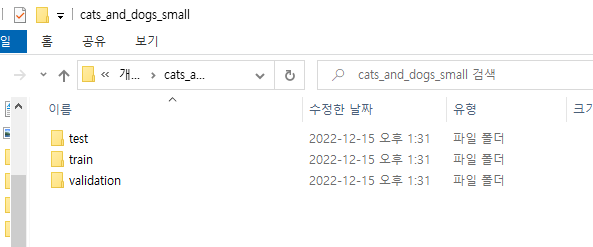

### 라벨링을 위해 cat/dog 디렉터리 생성

In [5]:
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

### 각 용도별로 이미지 분할
- 위 코드 실행 후 디렉터리는 아리 이미지와 같음
    
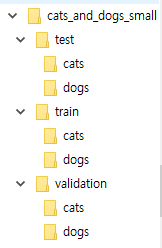

### 구성해놓은 디렉터리에 이미지 저장
- 수집 폴더에서 자동 복사
- 이미지명은 아래 형식으로 되어 있음
    - cat.일련번호.jpg/dog.일련번호.jpg
    - 파일명이 규칙이 있어야 복사가 쉬우므로 이미지를 수집할 때는 파일명을 정형화 해야 함
- 수집한 각 이미지(dog/cat)에서 순서대로 1000개는 train, 500개는 validation, 500개는 test로 복사

In [6]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
# 파일명 생성
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    # 복사코드

In [7]:
# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
 

In [8]:
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    

In [9]:
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

**복사가 잘 되었는지 확인하기 위해 각 분할(훈련/검증/테스트)에 들어 있는 사진의 개수를 카운트**

In [10]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [11]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [12]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [13]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [14]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [15]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


- 2,000개의 훈련 이미지
- 1,000개의 검증 이미지
- 1,000개의 테스트 이미지가 준비

- 분할된 각 데이터는 클래마다 동일한 개수의 샘플을 포함하고 있고 균형잡힌 이진 분류 문제이므로 정확도를 사용해 성공을 측정

#### 네트워크 구성하기(모델 구성)
- 합성곱 신경말 사용(컨브넷)

### 케라스 합성곱 층
- kearas.layers 패키지 아래 클래스로 구현되어 있음
- Conv2D 클래스로 제공
    - from tensorflow import keras
    - keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')
    - 첫번째 파라미터 : 필터(뉴런)수
    - 두번째 파라미터 : 커널(필터)의 크기
        - 필터수와 크기는 반드시 지정해야 함
    - 마지막 파라미터 : 활성화 함수
    - tip.특성맵은 활성화 함수를 통과한 후 임(편의상 이미지에 표현하지 않은 것 뿐) 
- 완전연결 신경망 Dense 층 대신 Conv2D층을 넣으면 합성곱 신경망이 됨
    - 합성곱신경망은 1개 이상 합성곱신경망층을 사용하면 합성곱모델이라고 함
    - 즉, 모든 층이 합성곱신경망일 필요는 없음

- Conv2D(relu 활성화 함수 사용)와 MaxPooling2D 층을 번갈아 쌓은 컨브넷을 생성 



- 이전보다 이미지가 크고 복잡한 문제이기 때문에 네트워크를 좀 더 크게 만들 것 임 
- Conv2D + MaxPooling2D 단계를 하나 더 추가
- 이렇게 하면 네트워크의 용량을 늘리고 Flatten 층의 크기가 너무 커지지 않도록 특성 맵의 크기를 줄일 수 있음
- 150 × 150 크기(임의로 선택한 것)의 입력으로 시작해서 Flatten 층 이전에 7 × 7 크기의 특성 맵으로 줄어 듬   


- 특성 맵의 깊이는 네트워크에서 점진적으로 증가하지만(32에서 128까지), 특성 맵의 크기는 감소함(150 × 150에서 7 × 7까지)
    - 이는 거의 모든 컨브넷에서 볼 수 있는 전형적인 패턴임    
    
    

- 이진 분류 문제이므로 네트워크는 하나의 유닛(크기가 1인 Dense 층)과 sigmoid 활성화 함수로 끝나고 이 유닛은 한 클래스에 대한 확률을 인코딩

In [39]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### **모델 확인**
- output shape 계산식
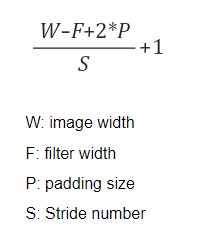

In [42]:
import numpy as np
# 첫번째 conv2d_24 (Conv2D) output shape
# W : 150 F(kernel size) : 3 P : 0  S : 1(생략되었음)
# 32개의 필터 사용
np.floor( (150 - 3) + 1)

148.0

- 두번째 층 max_pooling 2d는 (2,2) 풀링을 진행하므로 크기를 입력의 반으로 줄임
    - 148 => 74

In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 128)     

- **최종적으로 위의 모델의 특성(피처,픽셀수)은 150 * 150이 7*7로 줄어든다**

- 컴파일 단계에서 이전과 같이 RMSprop 옵티마이저를 선택
- 네트워크의 마지막이 하나의 시그모이드 유닛이기 때문에 이진 크로스엔트로피(binary crossentropy)를 손실로 사용

In [45]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## 데이터 전처리

- 데이터는 네트워크에 주입되기 전에 부동 소수 타입의 행렬로 적절하게 전처리되어 있어야 함
- 지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 대략 다음 과정을 거침

1.	사진 파일을 읽기
2.	JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩
3.	그다음 부동 소수 타입의 행렬로 변환
4.	픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정합니다(신경망은 작은 입력 값을 선호하기 때문).

- 케라스는 이런 단계를 자동으로 처리하는 유틸리티를 가지고 있음
- 케라스의 `keras.preprocessing.image`:  이미지 처리를 위한 헬퍼 도구

- `ImageDataGenerator` 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만들어줌

In [46]:
print(validation_dir)
print(train_dir)

./cats_and_dogs_small\validation
./cats_and_dogs_small\train


In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다


In [52]:
train_datagen

### 이미지 라벨링
- flow_from_directory( ) 함수
    - 이미지를 불러올 때 폴더명에 맞춰서 자동으로 labelling하는 함수
    - 이미지 크기 조정 기능도 있음

In [49]:
print(validation_dir)
print(train_dir)

./cats_and_dogs_small\validation
./cats_and_dogs_small\train


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
  # 첫번째 배치

In [77]:
  # 마지막 배치

(20, 150, 150, 3)

In [78]:
  # 타겟값

array([0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1.], dtype=float32)

- 제너레이터의 출력 하나를 확인
- 출력은 150 × 150 RGB 이미지의 배치((20, 150, 150, 3) 크기)
- 이진 레이블의 배치((20,) 크기)
- 각 배치에는 20개의 샘플(batch_size=20)이 있음
- 제너레이터는 이 배치를 무한정 만들어 냄
    - 타깃 폴더에 있는 이미지를 끝없이 하므로 반복 루프안의 어디에선가 break 문을 사용해야 함

### **generator를 사용한 데이터로 모델 훈련**
- 첫번째 인자 : 훈련데이터셋을 제공할 제네레이터를 지정. 앞서 생성한 train_generator사용
- steps_per_epoch : 한 epoch에 사용할 스텝 수를 지정.  총 2000개의 훈련 샘플이 있고 배치사이즈가 20 이므로 100 스텝으로 지정
    - 샘플 크기와 제너레이터 구성에 맞추어서 제대로 지정하지 않으면 샘플을 반복 순환하면서 행렬데이터를 만들어냄(즉, 이미지를 계속 반복 순환 하면서 이미지 행렬을 만들게 되므로 주의 해야 함)
- epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정
- validation_data : 검증데이터셋을 제공할 제네레이터를 지정
- validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정, 한번 검증시 100개씩 사용

ERROR! Session/line number was not unique in database. History logging moved to new session 664
Epoch 1/30


C:\Users\a\AppData\Local\Temp\ipykernel_11628\3259228942.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 39s 384ms/step - loss: 0.6935 - acc: 0.5200 - val_loss: 0.6831 - val_acc: 0.6230
Epoch 2/30
100/100 [==============================] - 39s 386ms/step - loss: 0.6720 - acc: 0.5865 - val_loss: 0.6634 - val_acc: 0.5560
Epoch 3/30
100/100 [==============================] - 41s 410ms/step - loss: 0.6379 - acc: 0.6305 - val_loss: 0.6292 - val_acc: 0.6550
Epoch 4/30
100/100 [==============================] - 39s 387ms/step - loss: 0.5977 - acc: 0.6710 - val_loss: 0.6576 - val_acc: 0.6000
Epoch 5/30
100/100 [==============================] - 39s 392ms/step - loss: 0.5699 - acc: 0.7095 - val_loss: 0.6041 - val_acc: 0.6620
Epoch 6/30
100/100 [==============================] - 41s 408ms/step - loss: 0.5454 - acc: 0.7240 - val_loss: 0.6010 - val_acc: 0.6750
Epoch 7/30
100/100 [==============================] - 40s 397ms/step - loss: 0.5237 - acc: 0.7360 - val_loss: 0.6264 - val_acc: 0.6540
Epoch 8/30
100/100 [==============================] - 39s 389ms/st

#### 훈련 종료후 모델 저장(습관적으로 저장해야 함 - 한번 훈련할 때 시간이 많이 소요되므로)

#### 시각화

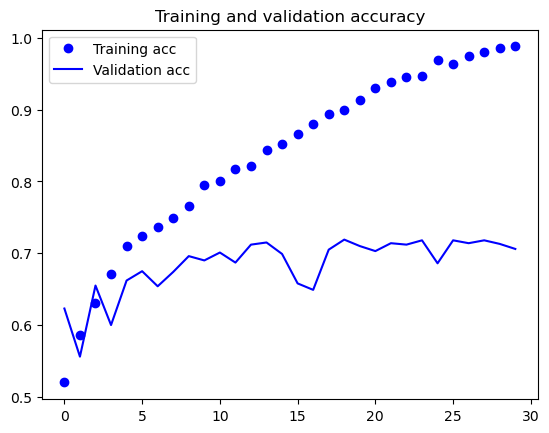

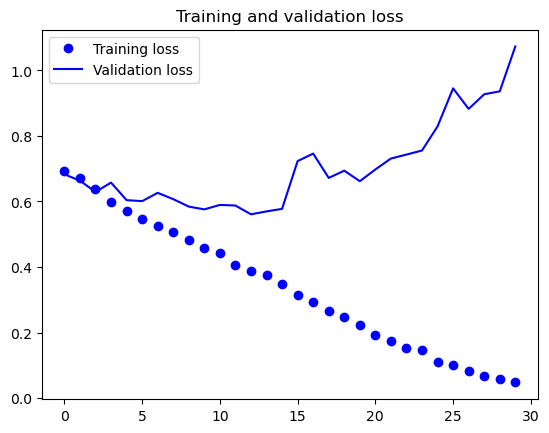

In [56]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 그래프는 과대적합의 특성을 보여줌
- 훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달 함
- 반면 검증 정확도는 70-72%에서 멈추었음
- 검증 손실은 다섯번의 에포크만에 최솟값에 다다른 이후에 더 이상 진전되지 않았고 반면 훈련 손실은 거의 0에 도달할 때까지 선형적으로 계속 감소함

- 비교적 훈련 샘플의 수(2,000개)가 적기 때문에 과대적합이 가장 중요한 문제임
    - 드롭아웃이나 가중치 감소(L2 규제)와 같은 과대적합을 감소시킬 수 있는 여러 가지 기법들이 있지만
    - 여기에서는 컴퓨터 비전에 특화되어 있어서 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 새로운 방법인 데이터 증식을 이용

## 데이터 증식 사용하기

- 과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생 - 무한히 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 모델이 학습할 수 있을것 임
- 데이터 증식은 기존의 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법임
- 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘리고
    - 훈련 시에 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표
        - 모델이 데이터의 여러 측면을 학습하면 일반화에 도움이 될 것임

- 케라스에서는 `ImageDataGenerator`가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하여 데이터 증식을 가능하게 함

In [58]:
# 이미지 전처리 유틸리티 모듈
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) 
                 for fname in os.listdir(train_cats_dir)])

In [59]:
fnames

['./cats_and_dogs_small\\train\\cats\\cat.0.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.1.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.10.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.100.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.101.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.102.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.103.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.104.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.105.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.106.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.107.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.108.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.109.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.11.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.110.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.111.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.112.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.113.jpg',
 './cats_and_dogs_small\\train\\cats\\cat.114.jpg',
 './cats_and_dogs_

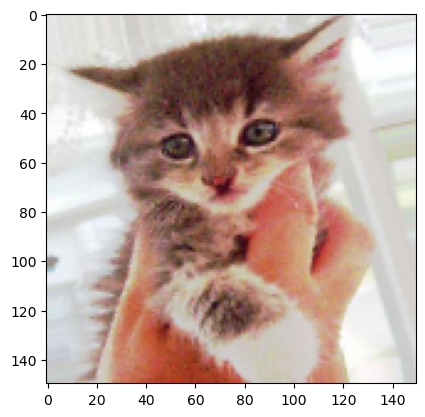

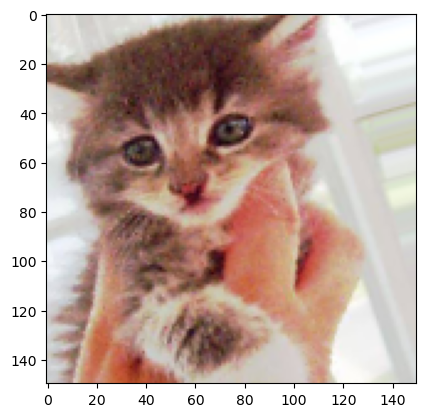

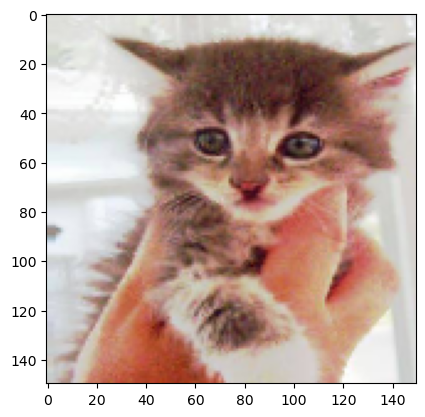

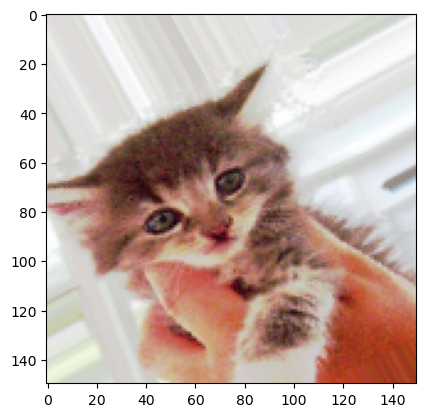

In [79]:
# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다


# (150, 150, 3) 크기의 넘파이 배열로 변환합니다


# (1, 150, 150, 3) 크기로 변환합니다


# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!


In [57]:
datagen = ImageDataGenerator(
     )

* `rotation_range`는 랜덤하게 사진을 회전시킬 각도 범위(0-180 사이).
* `width_shift_range`와 `height_shift_range`는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위입니다(전체 넓이와 높이에 대한 비율).
* `shear_range`는 랜덤하게 전단 변환을 적용할 각도 범위
* `zoom_range`는 랜덤하게 사진을 확대할 범위
* `horizontal_flip`은 랜덤하게 이미지를 수평으로 뒤집는다 수평 대칭을 가정할 수 있을 때 사용(예를 들어, 풍경/인물 사진).
* `fill_mode`는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략임

- 데이터 증식을 사용하여 새로운 네트워크를 훈련시킬 때 네트워크에 같은 입력 데이터가 두 번 주입되지 않는다
- 하지만 적은 수의 원본 이미지에서 만들어졌기 때문에 여전히 입력 데이터들 사이에 상호 연관성이 큼
    - 즉, 새로운 정보를 만들어낼 수 없고 단지 기존 정보의 재조합만 가능한 상태
        - 그렇기 때문에 완전히 과대적합을 제거하기에 충분하지 않을 수 있으므로 과대적합을 더 억제하기 위해 완전 연결 분류기(Dense 층) 직전에 `Dropout` 층을 추가함

In [63]:
from tensorflow.keras import layers
from tensorflow.keras import models
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

**데이터 증식과 드롭아웃을 사용하여 이 네트워크를 훈련**

In [86]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator의 설정에 의해 자동으로
# 학습 도중에 이미지에 임의 변형 및 정규화 적용
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식(변형)되어서는 안된다
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [87]:
train_generator[0][0].shape

(20, 150, 150, 3)

In [88]:
train_generator.samples

2000

In [89]:
validation_generator.samples

1000

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//20,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//20)

Epoch 1/100


C:\Users\a\AppData\Local\Temp\ipykernel_11628\1311327917.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - ETA: 0s - loss: 0.6929 - acc: 0.5125WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.


100/100 [==============================] - 46s 455ms/step - loss: 0.6929 - acc: 0.5125 - val_loss: 0.7084 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 40s 398ms/step - loss: 0.6888 - acc: 0.5395
Epoch 3/100
100/100 [==============================] - 40s 403ms/step - loss: 0.6710 - acc: 0.5840
Epoch 4/100
100/100 [==============================] - 40s 401ms/step - loss: 0.6538 - acc: 0.6100
Epoch 5/100
100/100 [==============================] - 40s 401ms/step - loss: 0.6395 - acc: 0.6305
Epoch 6/100
100/100 [==============================] - 40s 400ms/step - loss: 0.6365 - acc: 0.6310
Epoch 7/100
100/100 [==============================] - 40s 400ms/step - loss: 0.6267 - acc: 0.6385
Epoch 8/100
100/100 [==============================] - 41s 405ms/step - loss: 0.6055 - acc: 0.6715
Epoch 9/100
100/100 [==============================] - 41s 405ms/step - loss: 0.6071 - acc: 0.6615
Epoch 10/100
100/100 [==============================] - 41s 412ms/step - loss: 0.596

In [61]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [63]:
import keras
keras.__version__

'2.4.3'

In [21]:
model.save('cats_and_dogs_small_2.h5')

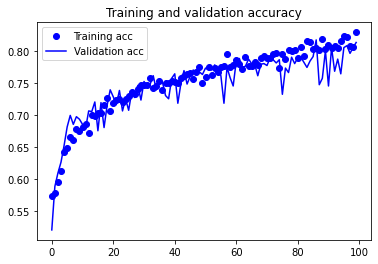

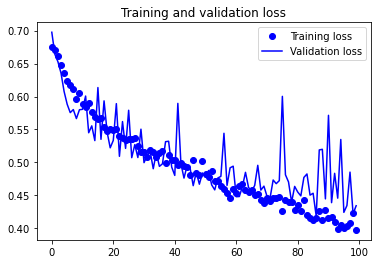

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
